In [1]:
# Code attribution: Yiyin Shen, Tyler Caraza-Harter
# Imports
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
import time
import pandas
import matplotlib.pyplot as plt

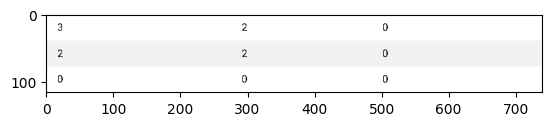

In [2]:
# Find the second table and take a screenshot
service = Service(executable_path="chromedriver-win64/chromedriver.exe")
driver = webdriver.Chrome(service=service)
url = "https://pages.cs.wisc.edu/~yw/CS320F23T19.html"
driver.get(url)
tables = driver.find_elements("tag name", "table")
table = tables[1]
table.screenshot("old_table.png")
img = plt.imread("old_table.png")
plt.imshow(img)

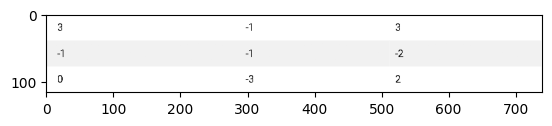

In [3]:
# Take another screenshot of the table after 1 second
time.sleep(1)
table.screenshot("new_table.png")
img = plt.imread("new_table.png")
plt.imshow(img)

In [4]:
# Scrape the table
rows = table.find_elements("tag name", "tr")
array = []
for row in rows:
    cols = row.find_elements("tag name", "td")
    list = []
    for col in cols:
        list.append(col.text)
    array.append(list)
pandas.DataFrame(array)

,0,1,2
0,3,-1,3
1,-1,-1,-2
2,0,-3,2


In [5]:
# Remember to quit when it's done
driver.quit()